In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [14]:
a, b = torch.tensor(3, dtype=torch.float32), torch.tensor(2, dtype=torch.float32)
a.requires_grad_(True)
b.requires_grad_(True)

tensor(2., requires_grad=True)

In [27]:
g = []
for x in torch.linspace(0.1, 10, 100):
    a = torch.tensor(x.clone().detach().requires_grad_(False), dtype=torch.float32, requires_grad=True)
    c = torch.log(a)
    c.backward()
    g.append(a.grad)

/var/folders/pf/4bvqx4zn6j50nfrncnylqpj00000gn/T/ipykernel_79418/1367160524.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  a = torch.tensor(x.clone().detach().requires_grad_(False), dtype=torch.float32, requires_grad=True)


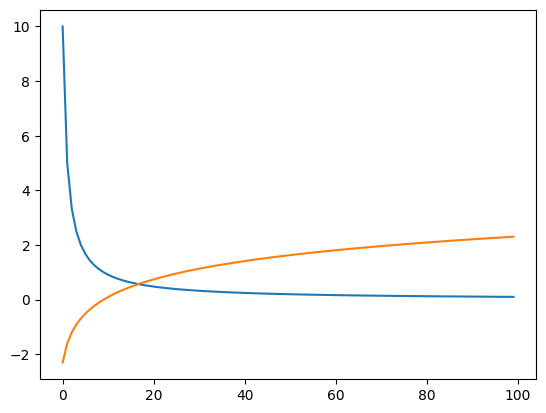

In [30]:
plt.plot(g)
plt.plot(np.log(np.linspace(0.1, 10, 100)))

In [56]:
import numpy as np

# Example dataset: rows are observations, columns are variables
data = np.array([
    [2.1, 3.2, 4.5],  # Observation 1
    [1.8, 3.0, 4.2],  # Observation 2
    [2.5, 3.8, 4.8],  # Observation 3
    [2.0, 3.4, 4.7]   # Observation 4
])

# Transpose data to have variables in rows if needed (optional, depends on use case)
# data = data.T

# Compute covariance matrix
cov_matrix = np.cov(data[:, :2], rowvar=False)  # rowvar=False ensures variables are in columns

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[0.08666667 0.09333333]
 [0.09333333 0.11666667]]


In [58]:
cov_matrix[0, 0] * cov_matrix[1, 1] - cov_matrix[0, 1] * cov_matrix[1, 0]

0.0014000000000000002

In [79]:
x, y = data[:, 0], data[:, 1]

((x - x.mean()) @ (y - y.mean())) / len(x) / x.std() / y.std()

0.9281909617845143

In [76]:
rho = np.corrcoef(data[:, 0], data[:, 1])
rho

array([[1.        , 0.92819096],
       [0.92819096, 1.        ]])

In [77]:
np.prod(cov_matrix.diagonal())* (1 - np.square(rho[0, 1]))

0.0014000000000000004

In [ ]:
np.square(2)

1.4142135623730951

In [65]:
np.correlate(data[:, 0], data[:, 1])

array([28.42])

In [49]:
data[:, 2].var(ddof=1)

0.06999999999999994

In [32]:
np.linalg.inv(cov)

array([[ 1.0989011 , -0.32967033],
       [-0.32967033,  1.0989011 ]])

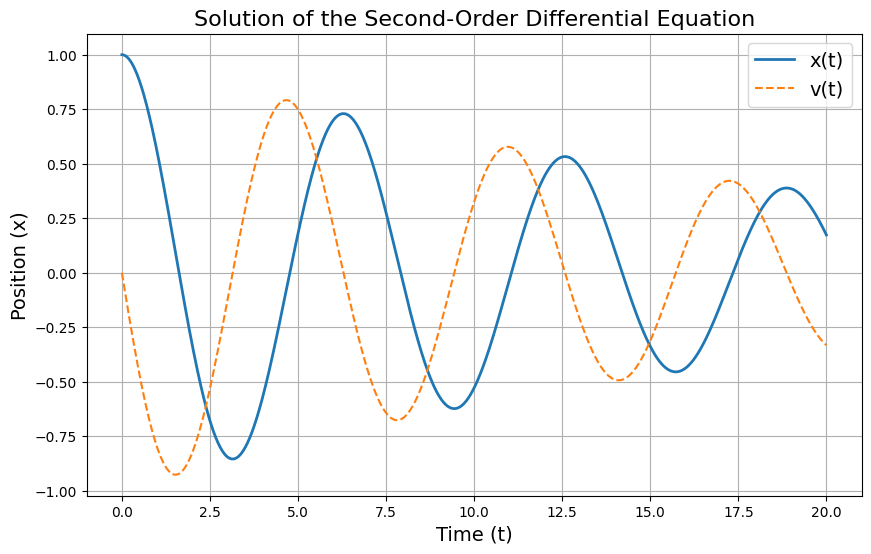

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
mu = 0.1   # Damping coefficient
omega = 1.0  # Natural frequency

# Define the second-order differential equation as a system of first-order ODEs
def second_order_system(t, y):
    x, v = y  # y[0] = x, y[1] = v (velocity = dx/dt)
    dxdt = v
    dvdt = -mu * v - omega * x
    return [dxdt, dvdt]

# Initial conditions
x0 = 1.0  # Initial position
v0 = 0.0  # Initial velocity

# Time span for the simulation
t_span = (0, 20)  # From t=0 to t=20
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Points where we evaluate the solution

# Solve the differential equation
solution = solve_ivp(second_order_system, t_span, [x0, v0], t_eval=t_eval)

# Extract the solution
t = solution.t
x = solution.y[0]
v = solution.y[1]

# Plot the solution
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='x(t)', linewidth=2)
plt.plot(t, v, label='v(t)', linestyle="--")
plt.title("Solution of the Second-Order Differential Equation", fontsize=16)
plt.xlabel("Time (t)", fontsize=14)
plt.ylabel("Position (x)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)
plt.show()

In [12]:
solution.y

array([[0.        , 0.01998669, 0.03985357, ..., 0.03409468, 0.04101677,
        0.04776098],
       [1.        , 0.99599936, 0.98802018, ..., 0.34976152, 0.34154493,
        0.33197916]])

tensor(2.1985, grad_fn=<NegBackward0>)
tensor(2.4887, grad_fn=<NegBackward0>)
tensor(2.7757, grad_fn=<NegBackward0>)
tensor(3.0550, grad_fn=<NegBackward0>)
tensor(3.3220, grad_fn=<NegBackward0>)
tensor(3.5666, grad_fn=<NegBackward0>)
tensor(3.7924, grad_fn=<NegBackward0>)
tensor(3.9945, grad_fn=<NegBackward0>)
tensor(4.1735, grad_fn=<NegBackward0>)
tensor(4.3265, grad_fn=<NegBackward0>)
tensor(4.4683, grad_fn=<NegBackward0>)
tensor(4.5950, grad_fn=<NegBackward0>)
tensor(4.7002, grad_fn=<NegBackward0>)
tensor(4.7941, grad_fn=<NegBackward0>)
tensor(4.8686, grad_fn=<NegBackward0>)
tensor(4.9448, grad_fn=<NegBackward0>)
tensor(5.0113, grad_fn=<NegBackward0>)
tensor(5.0628, grad_fn=<NegBackward0>)
tensor(5.1183, grad_fn=<NegBackward0>)
tensor(5.1647, grad_fn=<NegBackward0>)
tensor(5.2004, grad_fn=<NegBackward0>)
tensor(5.2353, grad_fn=<NegBackward0>)
tensor(5.2724, grad_fn=<NegBackward0>)
tensor(5.2813, grad_fn=<NegBackward0>)
tensor(5.3200, grad_fn=<NegBackward0>)
tensor(5.3256, grad_fn=<N

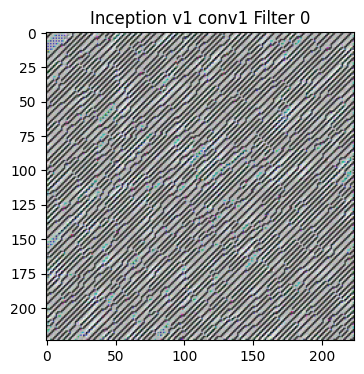

In [88]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn.utils import clip_grad_norm_
import torchvision
import matplotlib.pyplot as plt
import torch.functional as F

# 1. Load a pretrained Inception v1 model (GoogLeNet).
googlenet = torchvision.models.googlenet(pretrained=True)
googlenet.eval()

# 2. Pick a convolution layer you want to visualize. We'll use the first conv layer.
#    (You could also pick sub-layers inside inception blocks, but that requires deeper inspection.)
layer_to_hook = googlenet.conv1

# Choose the filter index you want to visualize (out of layer_to_hook.out_channels)
filter_idx = 0

def visualize_filter_inception(
    model, 
    layer,            # A specific nn.Module (Conv2d) to hook
    filter_index=0, 
    image_size=224, 
    steps=30, 
    step_size=0.1,
    clip_norm=2.0
):
    """
    Performs gradient ascent on a random image to maximize the activation of a specific
    filter (channel) in the given 'layer' of the Inception v1 (GoogLeNet) model.
    
    Args:
      model (nn.Module): The full GoogLeNet model (or subpart).
      layer (nn.Module): The particular convolution layer to hook.
      filter_index (int): Which out_channel (filter) index to maximize.
      image_size (int): Input image size (H=W).
      steps (int): Number of gradient ascent steps.
      step_size (float): Learning rate for each gradient ascent update.
      clip_norm (float): Gradient clipping max norm.

    Returns:
      A PyTorch tensor of shape (1, 3, image_size, image_size) of the
      gradient-ascent-optimized image.
    """

    # 1. Start with a random image in [0, 1].
    input_img = torch.rand((1, 3, image_size, image_size), requires_grad=True)
    # input_img.data.mul_(0.01)
    # 2. We'll capture the layer's output in a forward hook.
    activation = None
    def forward_hook(module, input, output):
        nonlocal activation
        # 'output' shape = (batch_size=1, out_channels, H, W)
        activation = output

    # Register the hook on the chosen layer.
    hook_handle = layer.register_forward_hook(forward_hook)

    # 3. We'll do gradient ascent using an optimizer on the input image.
    optimizer = optim.Adam([input_img], lr=step_size)
    # Define the preprocessing steps (adapted for tensors)
    mean = torch.tensor([0.485, 0.456, 0.406], device=input_img.device).view(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225], device=input_img.device).view(1, 3, 1, 1)

    for step in range(steps):
        optimizer.zero_grad()

        # Resize using torch.nn.functional.interpolate
        # resized_input = F.interpolate(input_img, size=(224, 224), mode='bilinear', align_corners=False)
        # Normalize
        normalized_input = input_img - input_img.min()
        normalized_input = normalized_input / normalized_input.max()

        normalized_input = (normalized_input - mean) / std
        # Forward pass through the entire model
        model(normalized_input)

        # Extract the activation for our chosen filter
        # activation has shape (1, out_channels, H, W)
        filter_act = activation[0, filter_idx, :, :]

        # For gradient ASCENT, we minimize the negative of the activation
        loss = -filter_act.mean()

        # Backprop to compute gradients wrt. input_img
        loss.backward()

        if step % 5 == 0:
            print(-loss)

        # Clip gradients to avoid exploding values
        # clip_grad_norm_([input_img], max_norm=clip_norm)

        # Update the image in the direction of maximizing that filter
        optimizer.step()

        # Optionally clamp to keep pixel values in [0,1]
        #with torch.no_grad():
        #    input_img.clamp_(0, 1)

    # Remove the hook to avoid side effects
    hook_handle.remove()

    return input_img.detach()

# 4. Run the visualization
result = visualize_filter_inception(
    model=googlenet,
    layer=layer_to_hook,
    filter_index=filter_idx,
    image_size=224,
    steps=500,
    step_size=0.01,
    clip_norm=2.0
)

# 5. Convert the result to a NumPy array and display it
result_np = result.squeeze().permute(1, 2, 0).cpu().numpy()
result_np = result_np - result_np.min()
result_np = result_np / result_np.max() * 255
result_np = result_np.astype(np.uint8)
plt.figure(figsize=(4, 4))
plt.imshow(result_np[:, :])
plt.title(f"Inception v1 conv1 Filter {filter_idx}")
plt.show()